In [27]:
!pip install pyvis
!pip install seaborn
!pip install plotly
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 13.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyvis.network import Network
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import spacy

# Loading the files

In [29]:
# Let's use OS module to find the current directory and form a filepath
# which will be used to read files.
# We do this to avoid FileNotFound error so that the project runs smoothly on any system

# Let's get the current working directory
base_path = os.getcwd()

# Now let's form the file paths to all 3 of our datafiles
# Variable names are chosen to reflect the type of data present in the datafiles
articles_path = os.path.join(base_path, 'Group 5', 'articles.GSTM1.csv')
authors_path = os.path.join(base_path, 'Group 5', 'authors.GSTM1.csv')
paper_counts_path = os.path.join(base_path, 'Group 5', 'paper_counts.csv')

# Loading the files using pandas 
articles = pd.read_csv(articles_path)
articles.index = articles.index + 1
authors = pd.read_csv(authors_path)
authors.index = range(1, len(authors) + 1)
paper_counts = pd.read_csv(paper_counts_path)
paper_counts.index = paper_counts.index + 1

## Displaying the files 

In [30]:
articles

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
1,10548311,A systematic review of genetic polymorphisms a...,Studies investigating the relationship between...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(8) 843-54,1999,A M,Dunning,AM,Cancer Research Campaign Human Cancer Genetics...
2,10548400,Prevalence of disease-related DNA polymorphism...,Genetic susceptibility polymorphisms may be of...,0959-8278,European journal of cancer prevention : the of...,(8) 441-7,1999,K,Woodson,K,"Division of Clinical Sciences, National Cancer..."
3,10564681,Glutathione S-transferase mu and theta polymor...,The enzymes encoded by the glutathione S-trans...,0027-8874,Journal of the National Cancer Institute,(91) 1960-4,1999,M,García-Closas,M,"M. García-Closas, Division of Cancer Epidemiol..."
4,10566550,Effect of vitamin intervention on the relation...,The GSTM1 (glutathione S-transferase mu-1) nul...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(8) 965-70,1999,K,Woodson,K,"Cancer Prevention Studies Branch, Division of ..."
5,10571654,Genetic cancer susceptibility and DNA adducts:...,Preventive strategies require identification o...,0361-090X,Cancer detection and prevention,(23) 445-53,1999,H,Bartsch,H,Division of Toxicology and Cancer Risk Factors...
...,...,...,...,...,...,...,...,...,...,...,...
2734,37920524,A case-control study and systematic review of ...,GSTM1 deletion was reported to be associated w...,2405-8440,Heliyon,(9) e21183,2023,Jie,Peng,J,"School of Clinical Medicine, The First Affilia..."
2735,37948104,GST polymorphism as a predictive biomarker for...,What is the central question of this study? Ge...,1469-445X,Experimental physiology,10.1113/EP091339,2023,Harsh,Yadav,H,Department of Pulmonary Medicine Government Me...
2736,37993433,Distinct transcriptomic profiles in children p...,Although the genetic basis and pathogenesis of...,2041-1723,Nature communications,(14) 7630,2023,Jake,Lin,J,"Prostate Cancer Research Center, Faculty of Me..."
2737,38019237,Genetic Polymorphism in Xenobiotic Metabolisin...,Oxidative stress combined with nullity of xeno...,2476-762X,Asian Pacific journal of cancer prevention : A...,(24) 3795-3804,2023,Arun,Pandiyan,A,"ICMR-National Institute of Nutrition, Tarnaka,..."


In [31]:
print("\nMissing values:")
print(articles.isnull().sum())


Missing values:
PMID                       0
Title                      0
Abstract                   0
ISSN                       0
Journal                    0
Location                  20
Year                       0
FirstAuthorForename        5
FirstAuthorLastname        1
FirstAuthorInitials       16
FirstAuthorAffiliation    81
dtype: int64


In [32]:
# Displaying rows with at least one missing value
rows_with_missing_values = articles[articles.isnull().any(axis=1)]

print('Total number of rows with atleast one missing value: ', rows_with_missing_values.shape[0])

Total number of rows with atleast one missing value:  99


<function matplotlib.pyplot.show(close=None, block=None)>

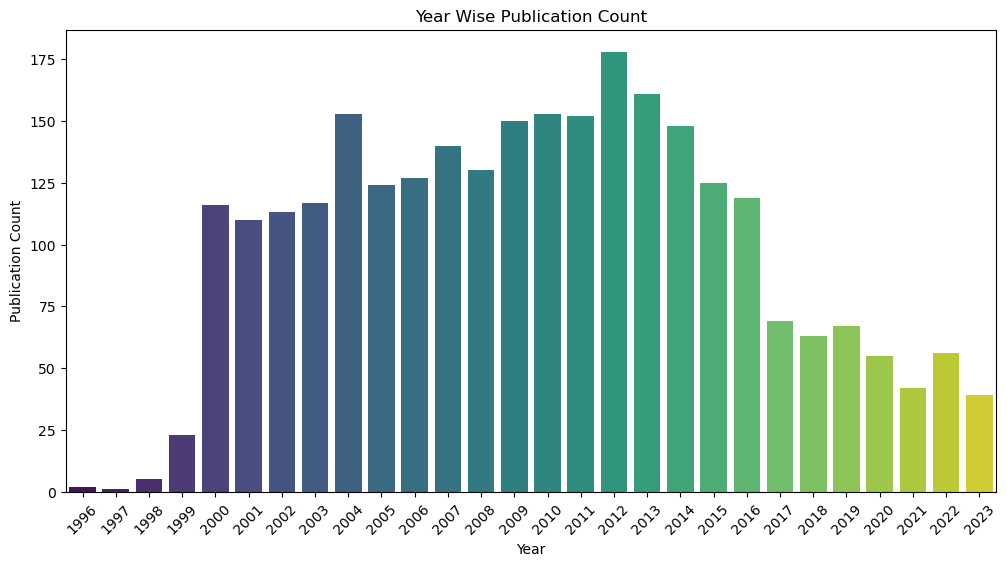

In [33]:
# Setting the figure size for the plot
plt.figure(figsize=(12,6))

# Creating a count plot for the 'Year' column from the DataFrame 'articles'
# Using the 'viridis' color palette for aesthetics
sns.countplot(x='Year', data=articles, palette='viridis')

# Adding title and axis labels to the plot
plt.title("Year Wise Publication Count")
plt.xlabel("Year")
plt.ylabel("Publication Count")

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show

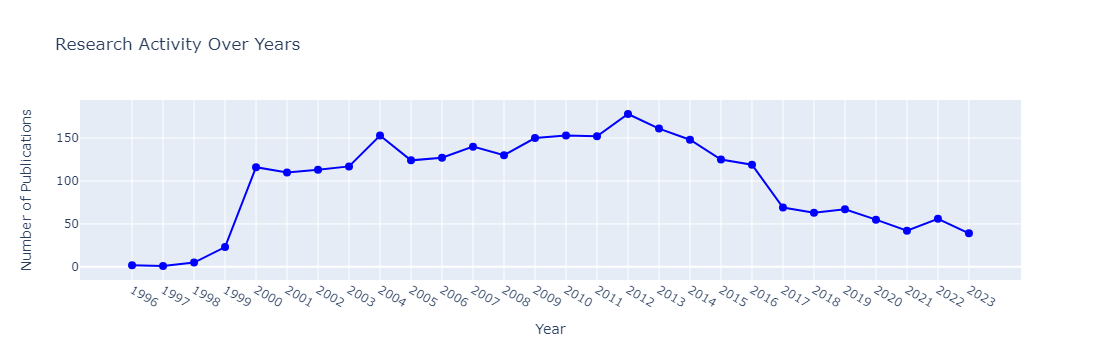

In [34]:
# Grouping the data by year and counting the number of publications for each year
research_activity = articles.groupby('Year').size()

# Create a line chart
fig = go.Figure()

# Add trace for the line chart
fig.add_trace(go.Scatter(x=research_activity.index, y=research_activity.values,
                         mode='lines+markers',  # Lines with markers
                         marker=dict(color='blue', size=8),  # Marker style
                         line=dict(color='blue', width=2),  # Line style
                         name='Research Activity'))  # Legend label

# Update layout
fig.update_layout(title='Research Activity Over Years',
                  xaxis_title='Year',
                  yaxis_title='Number of Publications',
                  xaxis=dict(type='category'),  # Categorical x-axis
                  yaxis=dict(type='linear'),    # Linear y-axis
                  hovermode='x unified')        # Unified hover mode

fig.show()


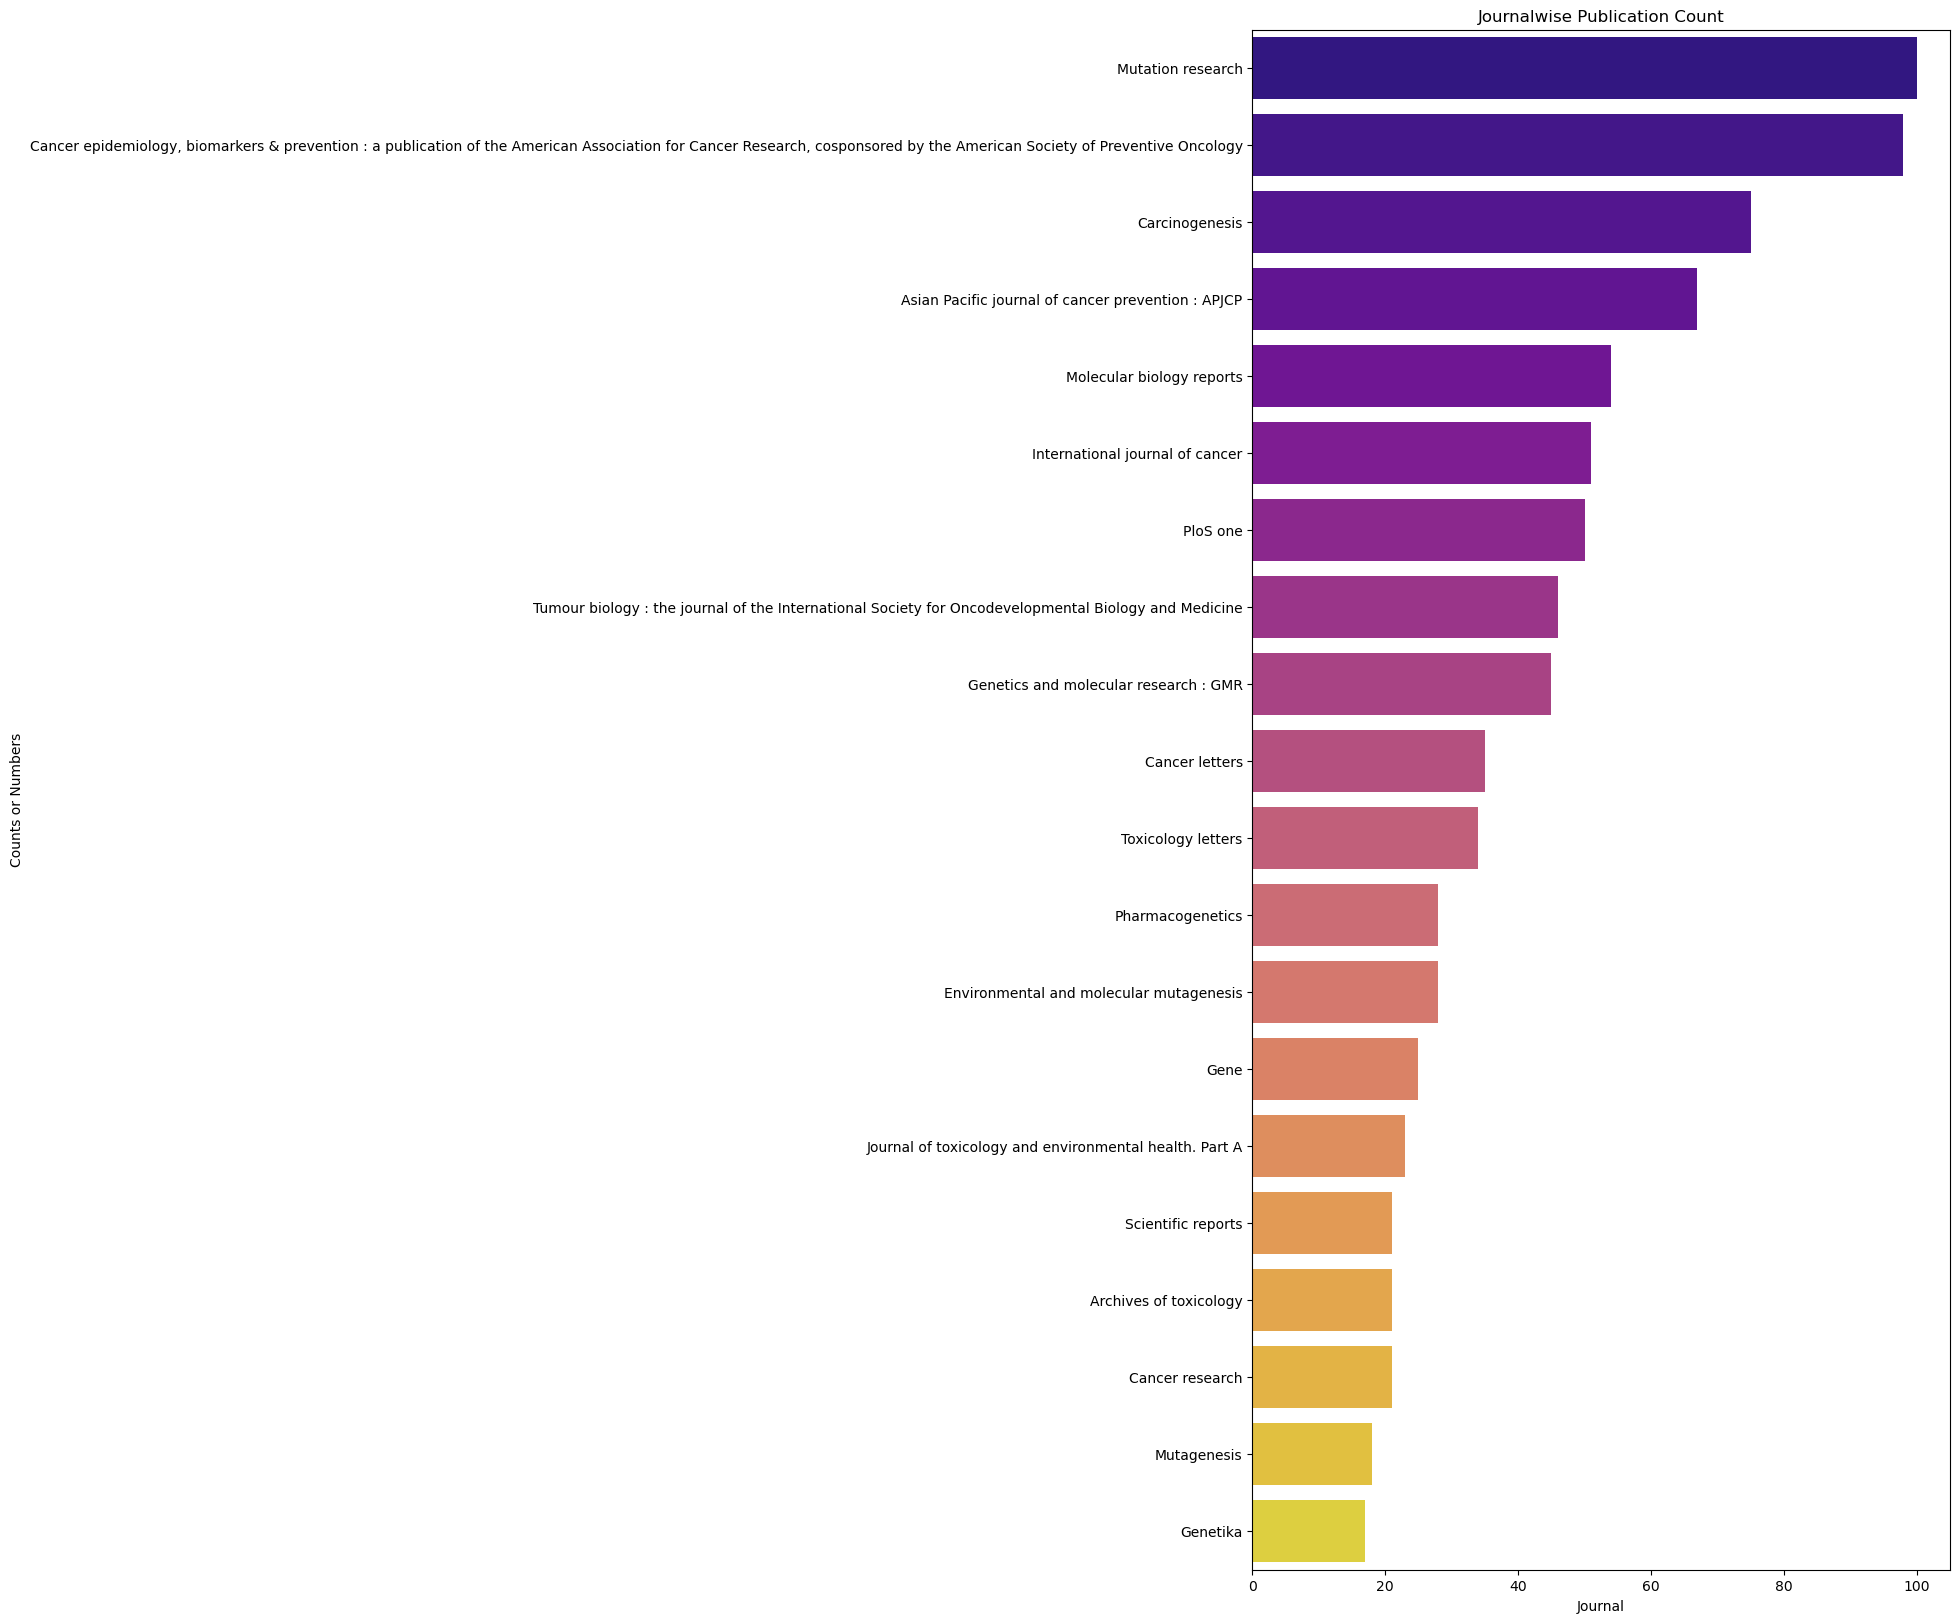

In [35]:
# Extract the top 50 journals based on publication count
journals = articles['Journal'].value_counts().head(20)

# Set up the figure size for visualization
plt.figure(figsize=(9,20))

# Create a bar plot to visualize the publication count for each journal
sns.barplot(x=journals.values, y=journals.index, palette='plasma')

# Set the title of the plot
plt.title("Journalwise Publication Count")

# Label the x-axis
plt.xlabel("Journal")

# Label the y-axis
plt.ylabel("Counts or Numbers")

# Show the plot
plt.show()


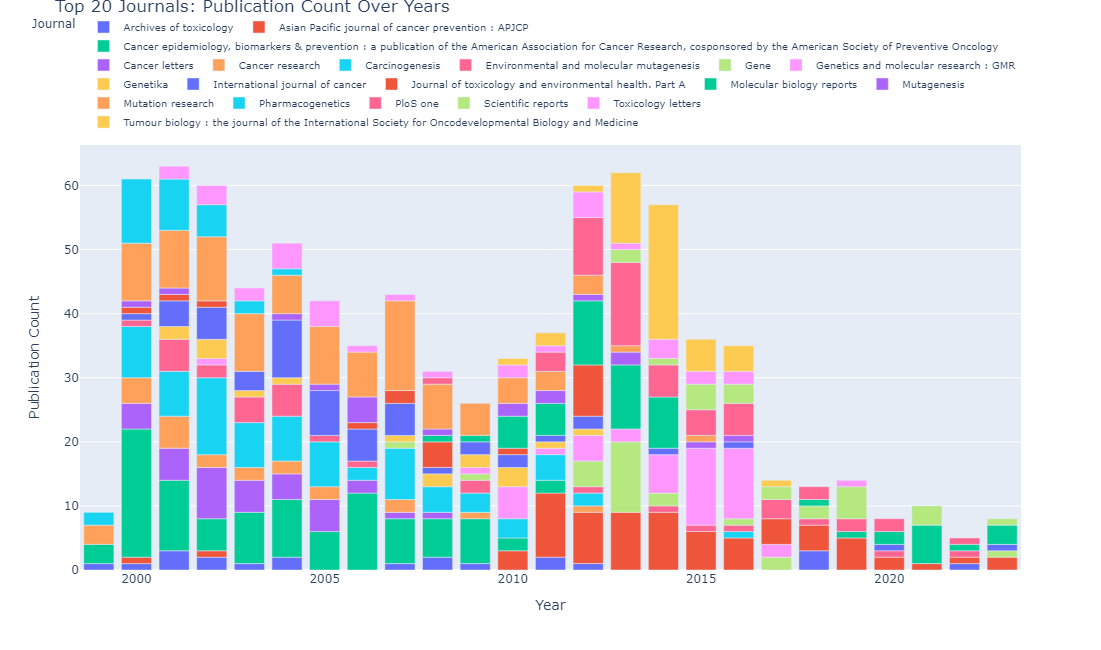

In [36]:
# Group by Journal and Year, then count the number of publications
journal_year_count = articles.groupby(['Journal', 'Year']).size().reset_index(name='Count')

# Get the top 10 journals with the highest total publication counts
top_journals = journal_year_count.groupby('Journal')['Count'].sum().nlargest(20).index

# Filter the data to include only the top 10 journals
top_journal_year_count = journal_year_count[journal_year_count['Journal'].isin(top_journals)]

# Convert to Plotly figure
fig = px.bar(top_journal_year_count, x='Year', y='Count', color='Journal',
             title='Top 20 Journals: Publication Count Over Years',
             labels={'Count': 'Publication Count', 'Year': 'Year'})

# Customize layout
fig.update_layout(xaxis=dict(title='Year'),
                  yaxis=dict(title='Publication Count'),
                  legend_title='Journal',
                  legend=dict(orientation='h', yanchor="bottom", y=1.02, xanchor="right", x=1,
                              font=dict(size=10), title_font=dict(size=12)),
                  title=dict(y=1),  # Adjust the 'y' value to move the title higher
                  height=650,       # Adjust the height of the plot
                  width=1000)      # Adjust the width of the plot

# Show the plot
fig.show()


/tmp/ipykernel_391/1766623610.py:29: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



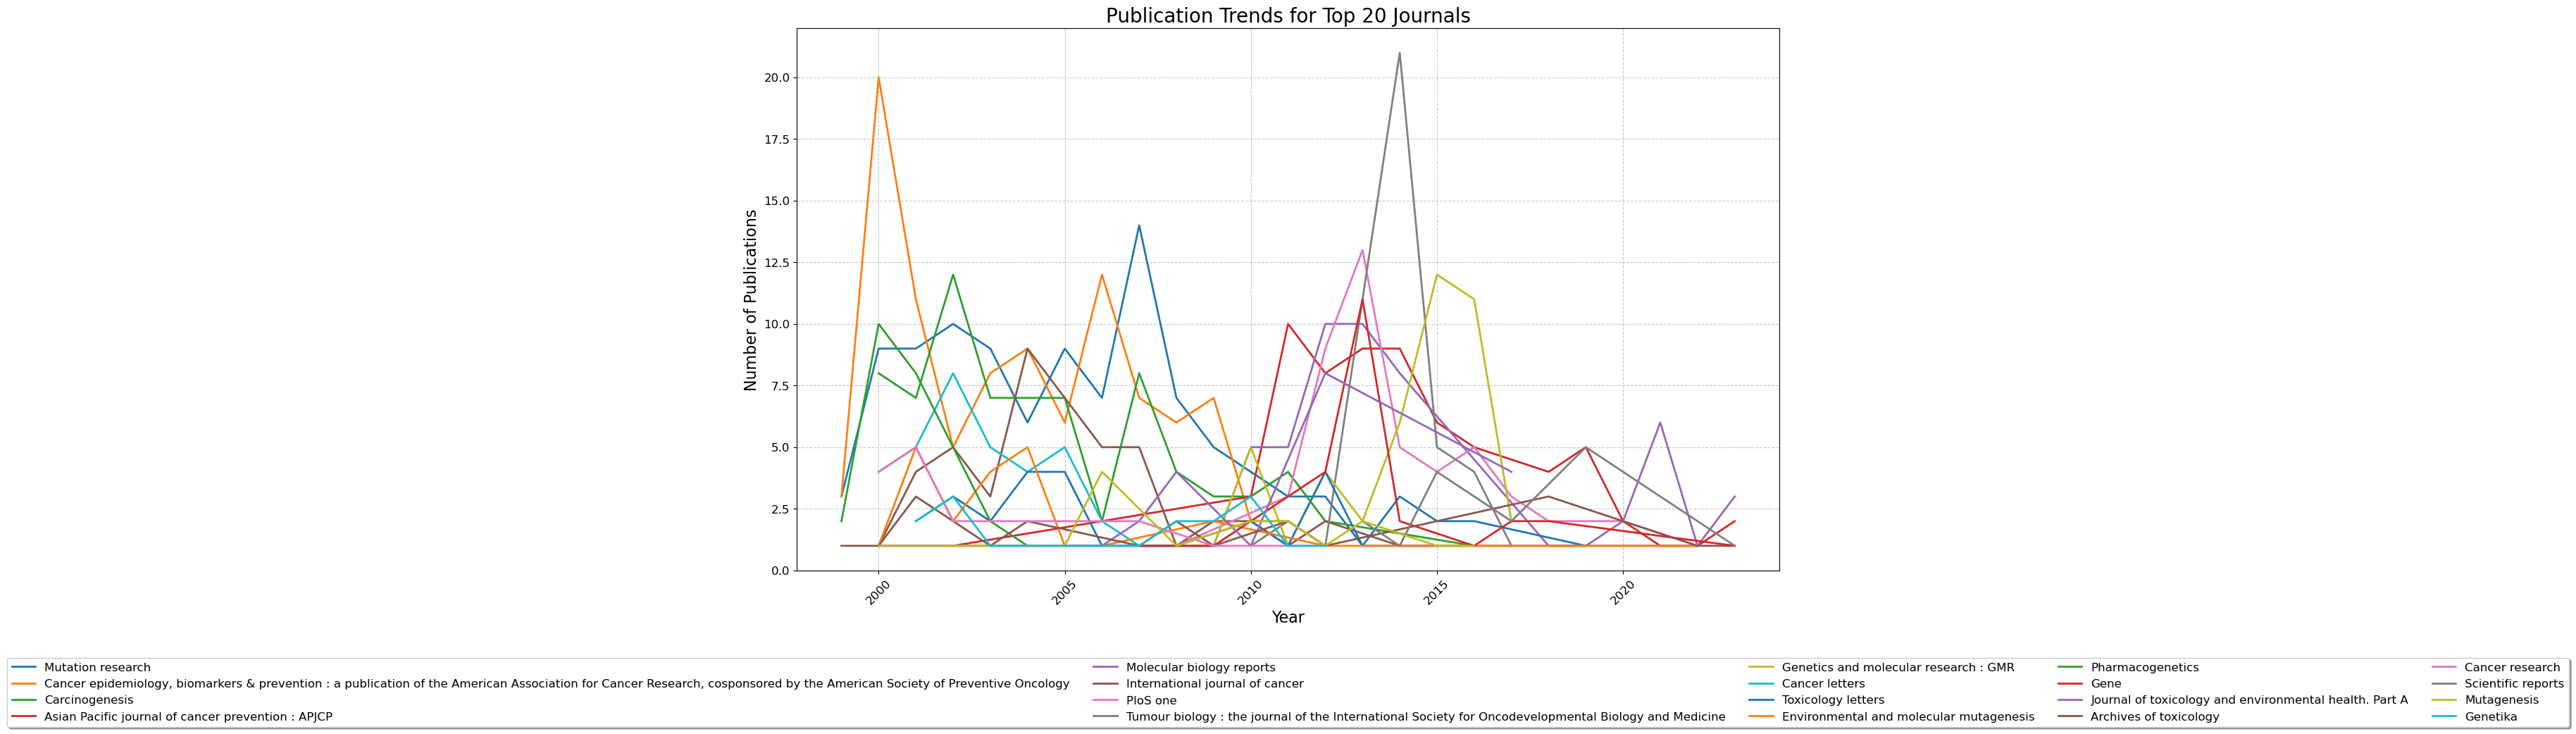

In [37]:
# Load the dataset
# articles = pd.read_csv(r"path_to_your_dataset.csv")

# Group by Journal and Year and count the number of publications
journal_year_count = articles.groupby(['Journal', 'Year']).size().reset_index(name='Count')

# Get the top 20 journals by publication count
top_20_journals = journal_year_count.groupby('Journal')['Count'].sum().nlargest(20).index

# Filter the dataset to include only the top 20 journals
journal_year_count_top_20 = journal_year_count[journal_year_count['Journal'].isin(top_20_journals)]

# Plotting publication trends for each journal
plt.figure(figsize=(18, 10))  # Set the figure size

# Iterate over unique journals in the top 20
for journal in top_20_journals:
    df_journal = journal_year_count_top_20[journal_year_count_top_20['Journal'] == journal]
    plt.plot(df_journal['Year'], df_journal['Count'], label=journal, linewidth=2)

plt.title('Publication Trends for Top 20 Journals', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Publications', fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Increase font size of y-axis labels

plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()


In [38]:
authors

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
1,10548311,1,A M,Dunning,AM,Cancer Research Campaign Human Cancer Genetics...
2,10548311,2,C S,Healey,CS,NaN
3,10548311,3,P D,Pharoah,PD,NaN
4,10548311,4,M D,Teare,MD,NaN
5,10548311,5,B A,Ponder,BA,NaN
...,...,...,...,...,...,...
19276,38019237,7,Padmaja R,Jonnalagadda,PR,"ICMR-National Institute of Nutrition, Tarnaka,..."
19277,38073224,1,Masoud Hassanzadeh,Makoui,MH,Tehran University of Medical Sciences Faculty ...
19278,38073224,2,Shiva,Fekri,S,Zanjan University of Medical Sciences Faculty ...
19279,38073224,3,Reza Hassanzadeh,Makoui,RH,Zanjan University of Medical Sciences Faculty ...


In [39]:
# Filling missing values in the 'AuthorAffiliation' column of the 'authors' DataFrame  using the forward-fill method
authors['AuthorAffiliation'] = authors['AuthorAffiliation'].fillna(method='ffill')

authors

/tmp/ipykernel_391/3670169666.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
1,10548311,1,A M,Dunning,AM,Cancer Research Campaign Human Cancer Genetics...
2,10548311,2,C S,Healey,CS,Cancer Research Campaign Human Cancer Genetics...
3,10548311,3,P D,Pharoah,PD,Cancer Research Campaign Human Cancer Genetics...
4,10548311,4,M D,Teare,MD,Cancer Research Campaign Human Cancer Genetics...
5,10548311,5,B A,Ponder,BA,Cancer Research Campaign Human Cancer Genetics...
...,...,...,...,...,...,...
19276,38019237,7,Padmaja R,Jonnalagadda,PR,"ICMR-National Institute of Nutrition, Tarnaka,..."
19277,38073224,1,Masoud Hassanzadeh,Makoui,MH,Tehran University of Medical Sciences Faculty ...
19278,38073224,2,Shiva,Fekri,S,Zanjan University of Medical Sciences Faculty ...
19279,38073224,3,Reza Hassanzadeh,Makoui,RH,Zanjan University of Medical Sciences Faculty ...


In [40]:
# Merge the two dataframes on the common column 'PMID'
merged_df = pd.merge(articles, authors, on='PMID')

# Create a new column 'AuthorFullName' by concatenating 'AuthorForename' and 'AuthorLastname'
merged_df['AuthorFullName'] = merged_df['AuthorForename'] + ' ' + merged_df['AuthorLastname']

# Display the merged DataFrame
merged_df

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,AuthorFullName
0,10548311,A systematic review of genetic polymorphisms a...,Studies investigating the relationship between...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(8) 843-54,1999,A M,Dunning,AM,Cancer Research Campaign Human Cancer Genetics...,1,A M,Dunning,AM,Cancer Research Campaign Human Cancer Genetics...,A M Dunning
1,10548311,A systematic review of genetic polymorphisms a...,Studies investigating the relationship between...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(8) 843-54,1999,A M,Dunning,AM,Cancer Research Campaign Human Cancer Genetics...,2,C S,Healey,CS,Cancer Research Campaign Human Cancer Genetics...,C S Healey
2,10548311,A systematic review of genetic polymorphisms a...,Studies investigating the relationship between...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(8) 843-54,1999,A M,Dunning,AM,Cancer Research Campaign Human Cancer Genetics...,3,P D,Pharoah,PD,Cancer Research Campaign Human Cancer Genetics...,P D Pharoah
3,10548311,A systematic review of genetic polymorphisms a...,Studies investigating the relationship between...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(8) 843-54,1999,A M,Dunning,AM,Cancer Research Campaign Human Cancer Genetics...,4,M D,Teare,MD,Cancer Research Campaign Human Cancer Genetics...,M D Teare
4,10548311,A systematic review of genetic polymorphisms a...,Studies investigating the relationship between...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(8) 843-54,1999,A M,Dunning,AM,Cancer Research Campaign Human Cancer Genetics...,5,B A,Ponder,BA,Cancer Research Campaign Human Cancer Genetics...,B A Ponder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19275,38019237,Genetic Polymorphism in Xenobiotic Metabolisin...,Oxidative stress combined with nullity of xeno...,2476-762X,Asian Pacific journal of cancer prevention : A...,(24) 3795-3804,2023,Arun,Pandiyan,A,"ICMR-National Institute of Nutrition, Tarnaka,...",7,Padmaja R,Jonnalagadda,PR,"ICMR-National Institute of Nutrition, Tarnaka,...",Padmaja R Jonnalagadda
19276,38073224,Individual effects of GSTM1 and GSTT1 polymorp...,This study aimed to understand the relationshi...,2149-9322,Turkish journal of obstetrics and gynecology,(20) 314-319,2023,Masoud Hassanzadeh,Makoui,MH,Tehran University of Medical Sciences Faculty ...,1,Masoud Hassanzadeh,Makoui,MH,Tehran University of Medical Sciences Faculty ...,Masoud Hassanzadeh Makoui
19277,38073224,Individual effects of GSTM1 and GSTT1 polymorp...,This study aimed to understand the relationshi...,2149-9322,Turkish journal of obstetrics and gynecology,(20) 314-319,2023,Masoud Hassanzadeh,Makoui,MH,Tehran University of Medical Sciences Faculty ...,2,Shiva,Fekri,S,Zanjan University of Medical Sciences Faculty ...,Shiva Fekri
19278,38073224,Individual effects of GSTM1 and GSTT1 polymorp...,This study aimed to understand the relationshi...,2149-9322,Turkish journal of obstetrics and gynecology,(20) 314-319,2023,Masoud Hassanzadeh,Makoui,MH,Tehran University of Medical Sciences Faculty ...,3,Reza Hassanzadeh,Makoui,RH,Zanjan University of Medical Sciences Faculty ...,Reza Hassanzadeh Makoui


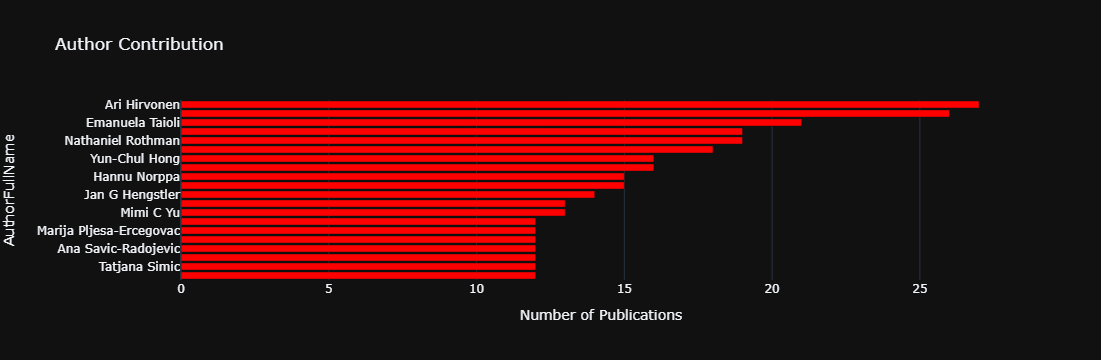

In [41]:
# Group by author and count the number of publications
author_contribution = merged_df['AuthorFullName'].value_counts().reset_index()
author_contribution.columns = ['AuthorFullName', 'PublicationCount']

# Sort the authors based on the number of publications (descending order)
author_contribution = author_contribution.sort_values(by='PublicationCount', ascending=False)

# Select the top N authors for visualization
top_authors = author_contribution.head(20)

# Create the Plotly bar chart
fig = go.Figure()

# Adding a bar trace for each author
fig.add_trace(go.Bar(
    x=top_authors['PublicationCount'],
    y=top_authors['AuthorFullName'],
    orientation='h',
    marker=dict(color='red'),  # Change the color as per your preference
))

# Customize layout
fig.update_layout(
    title='Author Contribution',
    xaxis_title='Number of Publications',
    yaxis_title='AuthorFullName',
    template='plotly_dark',  # You can choose different templates for different styles
    yaxis=dict(autorange='reversed')  # Invert y-axis to display the author with the highest publication count at the top
)

# Show the plot
fig.show()


In [42]:
authors['LastAuthorFullName'] = authors['AuthorForename'] + ' ' + authors['AuthorLastname']
authors

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,LastAuthorFullName
1,10548311,1,A M,Dunning,AM,Cancer Research Campaign Human Cancer Genetics...,A M Dunning
2,10548311,2,C S,Healey,CS,Cancer Research Campaign Human Cancer Genetics...,C S Healey
3,10548311,3,P D,Pharoah,PD,Cancer Research Campaign Human Cancer Genetics...,P D Pharoah
4,10548311,4,M D,Teare,MD,Cancer Research Campaign Human Cancer Genetics...,M D Teare
5,10548311,5,B A,Ponder,BA,Cancer Research Campaign Human Cancer Genetics...,B A Ponder
...,...,...,...,...,...,...,...
19276,38019237,7,Padmaja R,Jonnalagadda,PR,"ICMR-National Institute of Nutrition, Tarnaka,...",Padmaja R Jonnalagadda
19277,38073224,1,Masoud Hassanzadeh,Makoui,MH,Tehran University of Medical Sciences Faculty ...,Masoud Hassanzadeh Makoui
19278,38073224,2,Shiva,Fekri,S,Zanjan University of Medical Sciences Faculty ...,Shiva Fekri
19279,38073224,3,Reza Hassanzadeh,Makoui,RH,Zanjan University of Medical Sciences Faculty ...,Reza Hassanzadeh Makoui


In [43]:
# Calculate the number of publications for each author
researcher_activity = authors.groupby('LastAuthorFullName').size().reset_index(name='PublicationCount')

# Get the top 10 researchers based on publication count
top_researchers = researcher_activity.sort_values(by='PublicationCount', ascending=False).head(10)

# Sort the DataFrame by 'AuthorN' within each 'PMID' group
authors_sorted = authors.sort_values(by=['PMID', 'AuthorN'])

# Get the last author's work for each PMID
last_authors_work = authors_sorted.groupby('PMID').tail(1)

# Display the last author's work for each PMID
last_authors_work


,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,LastAuthorFullName
6,10548311,6,D F,Easton,DF,Cancer Research Campaign Human Cancer Genetics...,D F Easton
16,10548400,10,D,Albanes,D,"Division of Clinical Sciences, National Cancer...",D Albanes
24,10564681,8,D J,Hunter,DJ,"M. García-Closas, Division of Cancer Epidemiol...",D J Hunter
31,10566550,7,D,Albanes,D,"Cancer Prevention Studies Branch, Division of ...",D Albanes
36,10571654,5,K,Alexandrov,K,Division of Toxicology and Cancer Risk Factors...,K Alexandrov
...,...,...,...,...,...,...,...
19238,37920524,9,Hongzhou,Liu,H,"School of Clinical Medicine, The First Affilia...",Hongzhou Liu
19248,37948104,10,Siddharth,Sharma,S,"Department of Biotechnology, Thapar Institute ...",Siddharth Sharma
19269,37993433,21,Matti,Nykter,M,"Prostate Cancer Research Center, Faculty of Me...",Matti Nykter
19276,38019237,7,Padmaja R,Jonnalagadda,PR,"ICMR-National Institute of Nutrition, Tarnaka,...",Padmaja R Jonnalagadda


In [44]:
# Merge the DataFrame 'articles' with 'last_authors_work' based on the common column 'PMID'
last_authors_work = pd.merge(merged_df, last_authors_work, on=['PMID'], how='inner')

# Display the resulting DataFrame after the merge operation
last_authors_work


,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,...,AuthorLastname_x,AuthorInitials_x,AuthorAffiliation_x,AuthorFullName,AuthorN_y,AuthorForename_y,AuthorLastname_y,AuthorInitials_y,AuthorAffiliation_y,LastAuthorFullName
0,10548311,A systematic review of genetic polymorphisms a...,Studies investigating the relationship between...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(8) 843-54,1999,A M,Dunning,AM,...,Dunning,AM,Cancer Research Campaign Human Cancer Genetics...,A M Dunning,6,D F,Easton,DF,Cancer Research Campaign Human Cancer Genetics...,D F Easton
1,10548311,A systematic review of genetic polymorphisms a...,Studies investigating the relationship between...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(8) 843-54,1999,A M,Dunning,AM,...,Healey,CS,Cancer Research Campaign Human Cancer Genetics...,C S Healey,6,D F,Easton,DF,Cancer Research Campaign Human Cancer Genetics...,D F Easton
2,10548311,A systematic review of genetic polymorphisms a...,Studies investigating the relationship between...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(8) 843-54,1999,A M,Dunning,AM,...,Pharoah,PD,Cancer Research Campaign Human Cancer Genetics...,P D Pharoah,6,D F,Easton,DF,Cancer Research Campaign Human Cancer Genetics...,D F Easton
3,10548311,A systematic review of genetic polymorphisms a...,Studies investigating the relationship between...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(8) 843-54,1999,A M,Dunning,AM,...,Teare,MD,Cancer Research Campaign Human Cancer Genetics...,M D Teare,6,D F,Easton,DF,Cancer Research Campaign Human Cancer Genetics...,D F Easton
4,10548311,A systematic review of genetic polymorphisms a...,Studies investigating the relationship between...,1055-9965,"Cancer epidemiology, biomarkers & prevention :...",(8) 843-54,1999,A M,Dunning,AM,...,Ponder,BA,Cancer Research Campaign Human Cancer Genetics...,B A Ponder,6,D F,Easton,DF,Cancer Research Campaign Human Cancer Genetics...,D F Easton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19275,38019237,Genetic Polymorphism in Xenobiotic Metabolisin...,Oxidative stress combined with nullity of xeno...,2476-762X,Asian Pacific journal of cancer prevention : A...,(24) 3795-3804,2023,Arun,Pandiyan,A,...,Jonnalagadda,PR,"ICMR-National Institute of Nutrition, Tarnaka,...",Padmaja R Jonnalagadda,7,Padmaja R,Jonnalagadda,PR,"ICMR-National Institute of Nutrition, Tarnaka,...",Padmaja R Jonnalagadda
19276,38073224,Individual effects of GSTM1 and GSTT1 polymorp...,This study aimed to understand the relationshi...,2149-9322,Turkish journal of obstetrics and gynecology,(20) 314-319,2023,Masoud Hassanzadeh,Makoui,MH,...,Makoui,MH,Tehran University of Medical Sciences Faculty ...,Masoud Hassanzadeh Makoui,4,Negar,Ansari,N,Zanjan University of Medical Sciences Faculty ...,Negar Ansari
19277,38073224,Individual effects of GSTM1 and GSTT1 polymorp...,This study aimed to understand the relationshi...,2149-9322,Turkish journal of obstetrics and gynecology,(20) 314-319,2023,Masoud Hassanzadeh,Makoui,MH,...,Fekri,S,Zanjan University of Medical Sciences Faculty ...,Shiva Fekri,4,Negar,Ansari,N,Zanjan University of Medical Sciences Faculty ...,Negar Ansari
19278,38073224,Individual effects of GSTM1 and GSTT1 polymorp...,This study aimed to understand the relationshi...,2149-9322,Turkish journal of obstetrics and gynecology,(20) 314-319,2023,Masoud Hassanzadeh,Makoui,MH,...,Makoui,RH,Zanjan University of Medical Sciences Faculty ...,Reza Hassanzadeh Makoui,4,Negar,Ansari,N,Zanjan University of Medical Sciences Faculty ...,Negar Ansari


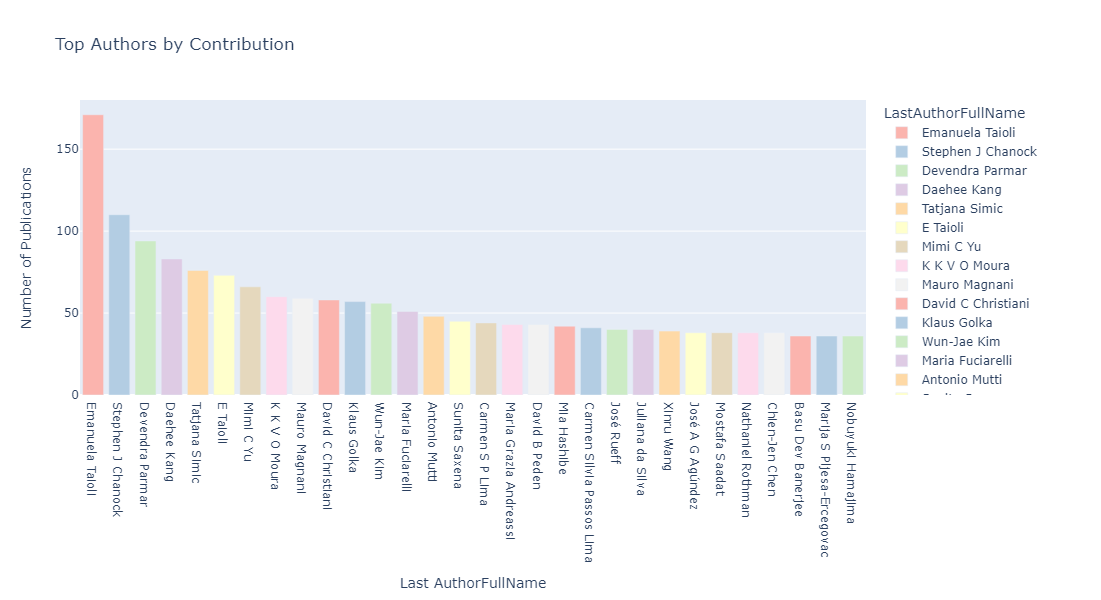

In [45]:
# Calculate Author Contribution
author_contribution = last_authors_work['LastAuthorFullName'].value_counts().reset_index()
author_contribution.columns = ['LastAuthorFullName', 'Number of Publications']

# Select Top Authors (You can change the number to display more or fewer top authors)
top_authors = author_contribution.head(30)

#a color map for different colors
color_map = px.colors.qualitative.Pastel1  # color map

#a bar chart using Plotly to visualize the top authors based on their contribution
fig = px.bar(top_authors,                    
             x='LastAuthorFullName',                  
             y='Number of Publications',         
             labels={'Number of Publications': 'Number of Publications'},  
             title='Top Authors by Contribution',  
             color='LastAuthorFullName',              
             color_discrete_map={author: color_map[i % len(color_map)] for i, author in enumerate(top_authors['LastAuthorFullName'])},    
             height=600, width=1000)              

# Update layout with axis titles
fig.update_layout(xaxis_title='Last AuthorFullName', yaxis_title='Number of Publications')

# Show the bar chart
fig.show()


In [46]:
paper_counts

,Year,Count
1,1799,1
2,1801,1
3,1802,1
4,1805,1
5,1866,1
...,...,...
139,2020,1132241
140,2021,1277048
141,2022,1324650
142,2023,1302390


In [47]:
print("\nMissing values:")
print(paper_counts.isnull().sum())


Missing values:
Year     0
Count    0
dtype: int64


In [48]:
# import pandas as pd

# # Merge based on the 'PMID' column
# merged = pd.merge(articles, authors, on=['PMID', 'AuthorForename', 'AuthorLastname', 'AuthorInitials', 'AuthorAffiliation'], how='inner')

# # Display the merged DataFrame
# merged.index = merged.index + 1
# merged

In [49]:
# # 2. Key Researchers
# researcher_activity = merged.groupby(['AuthorForename', 'AuthorLastname']).size().reset_index(name='PublicationCount')
# top_researchers = researcher_activity.sort_values(by='PublicationCount', ascending=False).head(10)

# # 3. Research Activity over the Years
# research_activity_over_years = merged.groupby('Year').size().reset_index(name='PublicationCount')

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Bar chart for top researchers
# plt.figure(figsize=(12, 8))
# bar_plot = sns.barplot(
#     x=top_researchers['AuthorLastname'] + ', ' + top_researchers['AuthorForename'],
#     y=top_researchers['PublicationCount'],
#     palette='viridis'
# )
# bar_plot.set(title='Top 10 Researchers in Every Field', xlabel='Researchers', ylabel='Number of Publications')
# bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right', fontsize=10)
# plt.tight_layout()
# plt.savefig('Top 10 Researchers in Every Field bar chart.png')
# plt.show()

# # Line chart for research activity over years
# plt.figure(figsize=(12, 8))
# line_plot = sns.lineplot(
#     x=research_activity_over_years['Year'],
#     y=research_activity_over_years['PublicationCount'],
#     marker='o',
#     color='teal'
# )
# line_plot.set(title='Research Activity Over the Years', xlabel='Year', ylabel='Number of Publications')
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('Research Activity Over the Years in all fields.png')
# plt.show()


# Robert's Code

in this secton we will create a dictonary with each first author as keys and the authors thye have worked with as the values to be used 
as the starting point for data manipulation for the network graph. We will also plot a choropleth map of authors and the country they are affilliated
with by extracting teh county name from their affiliating useing a natural language processing (nlp) model.

## Total papers for each author

In [50]:
#setting author forename and lastname as indices
authors_indexed_forename_lastname = authors.set_index(['AuthorForename', 'AuthorLastname'])

#creating a list of authors form the indices
authors_list = authors_indexed_forename_lastname.index.drop_duplicates()

#creating a new list of number of papers each author has been involved in
num_papers = [len(authors_indexed_forename_lastname.loc[author]) for author in authors_list]

#creating a dataframe from the two lists\n",
author_papers_num = pd.DataFrame(num_papers, authors_list, columns=['Total Papers'])

#sorting the dataframe",
author_papers_num_sorted = author_papers_num.sort_values('Total Papers', axis=0, ascending=False)

#printing the dataframe\n",
print(author_papers_num_sorted)

/tmp/ipykernel_391/2497386628.py:8: PerformanceWarning:

indexing past lexsort depth may impact performance.



                               Total Papers
AuthorForename AuthorLastname              
Ari            Hirvonen                  27
Mostafa        Saadat                    26
Emanuela       Taioli                    21
Daehee         Kang                      19
Nathaniel      Rothman                   19
...                                     ...
Vanina D       Heuser                     1
Vanessa M      Andrade                    1
Fernanda R     Silva                      1
Vanessa        Emmel                      1
Negar          Ansari                     1

[14557 rows x 1 columns]


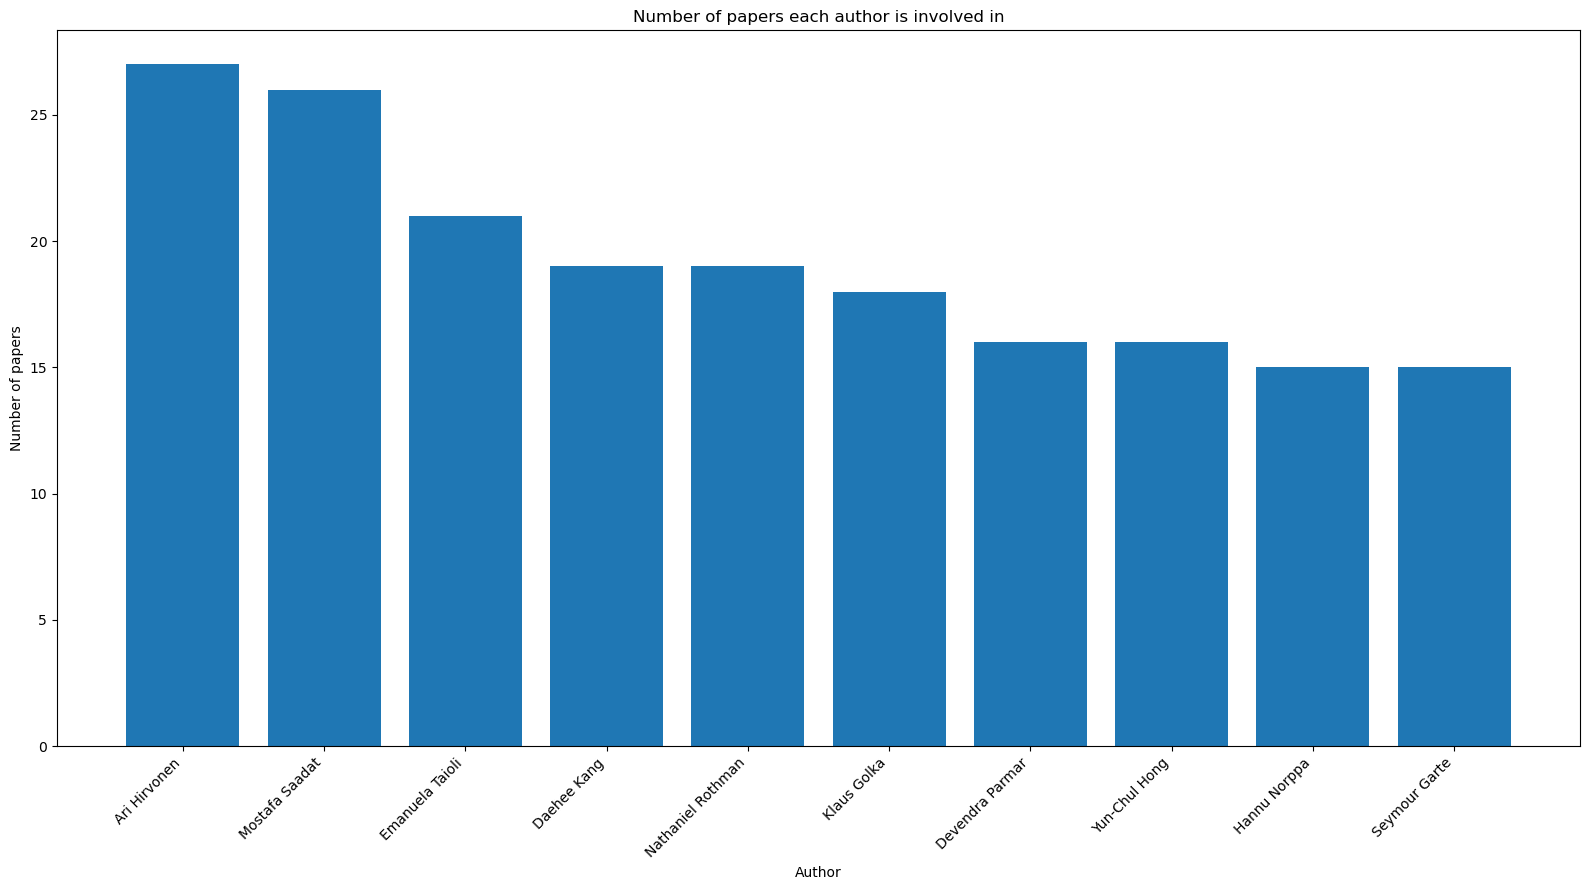

In [51]:
fig, ax = plt.subplots(figsize=(16, 9)) #creating figure

num_authors = 10 #ammount of authors to plot

x = np.arange(num_authors) #creating x axis points
y = author_papers_num_sorted['Total Papers'][:num_authors] #extracting bar heights

ax.bar(x, y) #plotting bars

ax.set_xticks(x) #setting x axis ticks to a a tick for each author

labels = [f'{author[0]} {author[1]}' for author in author_papers_num_sorted.index.to_numpy()][:num_authors] #getting author names from index
ax.set_xticklabels(labels, rotation=45, ha='right') #setting author names as tick labels

ax.set_xlabel('Author') #x axis label
ax.set_ylabel('Number of papers') #y axis label

ax.set_title('Number of papers each author is involved in') #graph title

 
fig.tight_layout() #setting figure to have tight layout
plt.savefig('Number of papers each author is involved in.png') #saving figure
plt.show() #showing figure

## Author relation dictonary

In [52]:
#getting a dataframe with Authors that are first authors
first_authors = authors_indexed_forename_lastname.groupby('AuthorN').get_group(1)

#creating a list of authors from the indices of the datframe
first_authors_list = first_authors.index.drop_duplicates()

grouped_paper = authors_indexed_forename_lastname.groupby('PMID') #grouping by paper
author_relations = {} #creating empty dictonary

for author in first_authors_list.to_numpy(): #looping through the list of first authors indices
    author_name = f'{author[0]} {author[1]}' #extrating name from the author mulitindex

    author_relations[author_name] = [] #setting the current first author and a new key and a empty list as the value

    papers_list = first_authors.loc[author]['PMID'].to_numpy() #list of papers the first author has written
    
    for paper in papers_list: #looping through the papers
        co_authors = grouped_paper.get_group(paper)[1:].index.to_numpy() #list of co-author indices

        for co_author in co_authors: #looping through co-author indices
            co_author_name = f'{co_author[0]} {co_author[1]}' #extrating name from the co-author mulitindex

            if co_author_name in author_relations[author_name]: continue #if co-author is already in list contiune to co-author
            else: author_relations[author_name].append(co_author_name) #if not in list append co-author to the list

print(author_relations)

/tmp/ipykernel_391/907817490.py:15: PerformanceWarning:

indexing past lexsort depth may impact performance.



{'A M Dunning': ['C S Healey', 'P D Pharoah', 'M D Teare', 'B A Ponder', 'D F Easton'], 'K Woodson': ['D Ratnasinghe', 'N K Bhat', 'C Stewart', 'J A Tangrea', 'T J Hartman', 'R Stolzenberg-Solomon', 'J Virtamo', 'P R Taylor', 'D Albanes', 'M Barrett'], 'M García-Closas': ['K T Kelsey', 'S E Hankinson', 'D Spiegelman', 'K Springer', 'W C Willett', 'F E Speizer', 'D J Hunter'], 'H Bartsch': ['M Rojas', 'U Nair', 'J Nair', 'K Alexandrov', 'A Risch', 'H Wikman'], 'I Stücker': ['I de Waziers', 'S Cenée', 'J Bignon', 'A Depierre', 'B Milleron', 'P Beaune', 'D Hémon', 'M Jacquet', 'S Cénée', 'P Kremers', 'P Boffetta', 'S Antilla', 'S Benhamou', 'A Hirvonen', 'S London', 'E Taioli'], 'M Rojas': ['I Cascorbi', 'K Alexandrov', 'E Kriek', 'G Auburtin', 'L Mayer', 'A Kopp-Schneider', 'I Roots', 'H Bartsch'], 'S M Hou': ['D Ryberg', 'S Fält', 'A Deverill', 'T Tefre', 'A L Børresen', 'A Haugen', 'B Lambert', 'K Yang', 'F Nyberg', 'G Pershagen', 'K Hemminki'], 'R B Hayes': ['L Zhang', 'S Yin', 'J A S

## Affiliation dataframe

In [53]:
#creating a datafram with author forename, last name and affiliation
affiliations_df = authors_indexed_forename_lastname['AuthorAffiliation'].dropna().reset_index() 
affiliation_list = affiliations_df['AuthorAffiliation'].to_numpy() #list of affiliations

In [54]:
affiliations_df

,AuthorForename,AuthorLastname,AuthorAffiliation
0,A M,Dunning,Cancer Research Campaign Human Cancer Genetics...
1,C S,Healey,Cancer Research Campaign Human Cancer Genetics...
2,P D,Pharoah,Cancer Research Campaign Human Cancer Genetics...
3,M D,Teare,Cancer Research Campaign Human Cancer Genetics...
4,B A,Ponder,Cancer Research Campaign Human Cancer Genetics...
...,...,...,...
19275,Padmaja R,Jonnalagadda,"ICMR-National Institute of Nutrition, Tarnaka,..."
19276,Masoud Hassanzadeh,Makoui,Tehran University of Medical Sciences Faculty ...
19277,Shiva,Fekri,Zanjan University of Medical Sciences Faculty ...
19278,Reza Hassanzadeh,Makoui,Zanjan University of Medical Sciences Faculty ...


## Data manipulation for choropleth map

In [55]:
nlp = spacy.load("en_core_web_sm") #loading in nlp model

def pre_filter(text): 
    '''
    prefiltering on to remove email addresses which may contain place names which may get picked up
    when trying to extract country names
    '''
    
    doc = nlp(text) #object containing processed data (contains each word in input string and some infomation about it known as tokens)
    
    filtered_text = str() #new string to store text
    
    for token in doc: #looping through each token
        if '@' not in token.text: #if @ symbol is not in the word
            filtered_text += f' {token.text}' #add word to new string
    return filtered_text

In [ ]:
author_place = [] #list to store author places 

for affiliation in affiliation_list: #looping through each affiliation

    filtered_text = pre_filter(affiliation) #filtering useing above filter

    #object containing filtered processed data (contains each word in input string and some infomation about it known as tokens)
    doc = nlp(filtered_text) 
    
    geo_data = [] #list to store geographical data
    
    for ent in doc.ents: #looping through each token entity
        if ent.label_ == 'GPE': #if entity label is geographical
            geo_data.append(ent.text) #add to geographical data list
    
    if len(geo_data) == 0: author_place.append(np.nan) #if no graphical as found add nan to list
    else: author_place.append(geo_data[-1]) #otherwise add last element of geographical data list to author place list

'''
Reasoning behind adding last element in geographical data list is that in many cases the author affiliation follows along the lines of
Reasearch group, department, university, city, country, so the last element in the geographical data list will be the country.
there are also many cases where this isn't the case for example a city name might be picked up. 

This code also takes about 2 mins to run
'''

In [ ]:
affiliations_df['AuthorPlace'] = author_place #creating a new column in affiliation dataframe

#replacing some data in dataframe so not to confuse country names when plotting for choropleth map 

#Standardising some USA data
affiliations_df.replace('U.S.A.', 'USA', inplace=True)
affiliations_df.replace('u.s.a.', 'USA', inplace=True)
affiliations_df.replace('United States of America', 'USA', inplace=True)
affiliations_df.replace('United States', 'USA', inplace=True)

#Standardising some China data
affiliations_df.replace("People 's Republic of China", 'China', inplace=True)
affiliations_df.replace('P.R.China', 'China', inplace=True)

#Standardising some UK data
affiliations_df.replace('U.K.', 'United Kingdom', inplace=True)
affiliations_df.replace('England', 'United Kingdom', inplace=True)
affiliations_df.replace('Scotland', 'United Kingdom', inplace=True)

affiliations_df.replace('Auckland , New Zealand', 'New Zealand', inplace=True)

affiliations_df.replace('Perugia', 'Itally', inplace=True) #plotly thinks this city in Itally is the country Peru

affiliations_df.replace('Ankara - Turkey', 'Turkey', inplace=True)

affiliations_df.replace('Republic of Kazakhstan', 'Kazakhstan', inplace=True)

In [ ]:
affiliations_df

In [ ]:
affiliations_indexed_author_place_df = affiliations_df.set_index('AuthorPlace') #setting author place as an index
affiliations_indexed_author_place_df

In [ ]:
#calculating Percentage of data left after nan Author places have been removed
print(f"Percentage of data left = {(len(affiliations_df['AuthorPlace'].dropna())/len(affiliations_df['AuthorPlace']))*100:.1f}%")

In [ ]:
num_authors = [] #list to store number of authors from each place
place_list = affiliations_df['AuthorPlace'].dropna().drop_duplicates().to_numpy() 

for place in place_list: #looping through place list
    if type(affiliations_indexed_author_place_df.loc[place]) == pd.Series:
        num_authors.append(1)
    else:    
        num_authors.append(len(affiliations_indexed_author_place_df.loc[place]))

In [ ]:
#creating a new dataframe with number of authors from each country
num_authors_place_df = pd.DataFrame((place_list, num_authors), index=['Place','Number of Authors']).T
num_authors_place_df['Number of Authors'] = num_authors_country_df['Number of Authors'].astype(int)

In [ ]:
num_authors_place_df

## Choropleth map

In [ ]:
fig = px.choropleth(num_authors_place_df, locations='Place',
                    locationmode='country names',
                    color='Number of Authors', 
                    hover_name='Place',
                    color_continuous_scale=px.colors.sequential.Plasma,)
                    #width=1920, height=1080) #creating choropleth map

fig.write_html('Choropleth map of authors per country.html') #saving figure as html to display in web browser
fig.write_image('Choropleth map of authors per country.png', engine='kaleido',
                 width=1920, height=1080) #saving figure as png for use in presentation


# Keshav's code

## Plotting a network graph
In this section, we will plot a network graph illustrating the relationship between 
authors who have collaborated more than 2 times. 

The reason for eliminating the occurences where the authors collaborated once, is because there are around 14,500 authors in this dataset, so displaying each one of them 

on a graph would be counter-productive (and nonetheless time-consuming).

### Data Manipulation
We will perform data manipulation first, and get the data ready to be plotted.

Let's start by making a copy of the dataset cause we will perform manipulations on the dataset.

Since these variables won't be used elsewhere in this code and only act as (apparently)temporary variables, their name doesn't have any meaning, and is arbitrary.

We will - 
1. Make a dataframe with primary author name and their collaborators as 2 columns.
2. Calculate the number of collaborations and put them in a new column 'Weight'.
3. Make new variables which will hold the data to be used for plotting.

In [ ]:
# Here we will perform the first step

# Let's read the dataframe again and store it in 'df' variable
df = pd.read_csv(authors_path)
# Delete rows where AuthorForename or AuthorLastname is empty
df = df.dropna(axis=0, subset=['AuthorForename', 'AuthorLastname'])

# Modifying the DataFrame
df3 = pd.DataFrame()
# Group by PMID
for key,value in df.groupby('PMID'):
    first_author = str(value.iloc[0]['AuthorForename']) + ' ' + str(value.iloc[0]['AuthorLastname'])
    for i in range(1, value.shape[0]):
        col_author = str(value.iloc[i]['AuthorForename']) + ' ' + str(value.iloc[i]['AuthorLastname'])
        df_temp = pd.DataFrame([[first_author, col_author]], columns=['Primary','Collaborators'])
        df3 = pd.concat([df3,df_temp])

# Let's see how our dataframe looks like
print(df3)

In [ ]:
# This code calculates the number of collaborations between 2 authors 
# and puts them in weights column and stores the data in a new dataframe

df4 = pd.DataFrame()
# Grouping by primary authors
for key,value in df3.groupby('Primary', sort=False):
    # First author
    first_author = key
    # Grouping by collaborating authors because that would give us (single or multiple)
    # rows representing the number of collaborations between primary author and collaborating author
    for key2,value2 in value.groupby('Collaborators'):
        # Number of collaborations with the primary author would then be the number of 
        # rows in the value2 dataframe
        no_of_colabs = value2.shape[0]

        # Collaborating author
        col_author = key2

        # Loading the data - primary author, collaborating author and weight (no of collaborations)
        # in a temporary dataframe to combine with the empty dataframe initialised outside the loop
        df_temp = pd.DataFrame([[first_author, col_author, no_of_colabs]], columns=['Primary','Collaborators','Weight'])

        # Concatenating the dataframe
        df4 = pd.concat([df4,df_temp])

# Let's see how our dataframe looks like
df4

In [ ]:
# Let's sort the data into variable to be used for plotting
# We will use pyvis to plot interactive graph which give us filtering functionality
# It accepts a node list (i.e. list of all authors), node size (how big the node will look),
# and what text to display while hovering over a node (we will display that node's neighbours)

# First of all, let's select only the rows where Weight>1
# i.e. where authors have collaborated more than once
# and store it in a temporary dataframe
temp = df4[df4['Weight'] > 1]

# Making a list of all the authors
# Primary authors' list
author_list = list(temp['Primary'].unique())
# Collaborators' list
collaborators_list = list(temp['Collaborators'].unique())
# Every node (authors + collaborators)
every_node = author_list + list(set(collaborators_list) - set(author_list))

# Storing node sizes 
node_size = []
for author in author_list:
    # Un-comment this line to size the nodes by the number of total colabs with every author
    size = int(temp[temp['Primary']==author]['Weight'].sum())      # OLD
    
    # This statement sizes the node based on the count of authors they have worked with
    # To size nodes based on the total number of papers the author is involed in, rather than
    # the count of authors, uncomment the statement 'OLD' and comment 'NEW'
    # size = temp[temp['Primary']==author].shape[0]      # NEW
    node_size.append(size)
# Filling other node sizes as 0
for i in list(set(collaborators_list) - set(author_list)):
    node_size.append(0)

# Storing text to display while hovering over node
neighbour_list = []
for author in author_list:
    neighbours_str = f'{author}\'s neighbours:\n'
    for collaborator in temp[temp['Primary']==author]['Collaborators']:
        # wt variable used to find out number of colabs with primary author
        wt = temp[temp['Primary']==author]
        wt = wt[wt['Collaborators']==collaborator]['Weight'][0]
        neighbours_str = neighbours_str + collaborator + f' ({wt})' + '\n'
    neighbour_list.append(neighbours_str)
# Setting other hover displays as the name of authors
for collaborator in list(set(collaborators_list) - set(author_list)):
    neighbour_list.append(collaborator)

### Plotting
Let's plot a network graph using the variables we have prepared above
Pyvis gives us the liberty to save the graph as a .html file and use it anywhere on any device.

Thr graph will be interactive. We will be able to apply filters - view the authors-collaborators who have collaborated a certain number of times, view the authors who were involved in certain number of papers, etc.

We will save the graph as 'author-graph.html' in the same directory where this notebook resides.

In [ ]:
# Initialising pyvis.network's Network instance
g = Network(
    height="100%",
    width="100%",
    bgcolor="#222222",
    font_color="white",
    notebook=True,
    cdn_resources='remote',
    select_menu=True,
    filter_menu=True
)

# Setting layout
g.force_atlas_2based()

# Adding nodes
g.add_nodes(
    every_node,
    value = node_size,
    title = neighbour_list,
    label = every_node
)

# Adding edges
for _,row in temp.iterrows():
    from_node = str(row['Primary'])
    to_node = str(row['Collaborators'])
    weight = int(row['Weight'])
    g.add_edge(from_node, to_node, weight=weight)


# Let's save the graph as author-graph.html
g.save_graph('author-graph.html')

We have successfully plotted the network graph. Now let's move onto plotting the authors who have transitioned from Primary to Collaborators over the years.

## Plotting author-role
In this section, we will plot the authors who have transitioned from Primary to Collaborating authors over the years.

We will perform data manipulation first, followed by plotting.

### Data Manipulation
We will read the articles and authors data again, and add year information to a dataframe similar to the one we created above.

In [ ]:
# Reading the data
authors2 = pd.read_csv(authors_path)
articles2 = pd.read_csv(articles_path)

# This code creates a new dataframe with primary author's name and their collaborators,
# representing the relationship between researchers.

df3 = pd.DataFrame()
# Group by PMID
for key,value in authors2.groupby('PMID'):
    # Delete rows where AuthorForename or AuthorLastname is empty
    value = value.dropna(axis=0, subset=['AuthorForename', 'AuthorLastname'])
    
    if value.empty is False:
        first_author = str(value.iloc[0]['AuthorForename']) + ' ' + str(value.iloc[0]['AuthorLastname'])
        if value.shape[0] > 1:
            for i in range(1, value.shape[0]):
                col_author = str(value.iloc[i]['AuthorForename']) + ' ' + str(value.iloc[i]['AuthorLastname'])
                df_temp = pd.DataFrame([[key, first_author, col_author]], columns=['PMID','Primary','Collaborators'])
                df3 = pd.concat([df3,df_temp])
        elif value.shape[0] == 1:
            col_author = first_author
            df_temp = pd.DataFrame([[key, first_author, col_author]], columns=['PMID','Primary','Collaborators'])
            df3 = pd.concat([df3,df_temp])
        else:
            pass

# Creating a list 'year' which contains the year values of corresponding 
# rows in the dataframe df3
year = []
for _,row in df3.iterrows():
    year.append(int(articles2.loc[articles2['PMID']==row['PMID'], 'Year'].values[0]))

# Creating a new column in df3 to add year information 
df3['Year'] = year

In [ ]:
# Creating a list of authors in both Primary and Collaborators columns combined
auth_list = set(list(df3['Primary'].unique())) | set(list(df3['Collaborators'].unique()))
auth_list = list(auth_list)

# Creating a list grow_auth which has list of authors who were Primary author
# or collaborator in any point in time
grow_auth = []
for author in auth_list:
    auth_pri = df3['Primary'].isin([author]).any()
    auth_col = df3['Collaborators'].isin([author]).any()
    if auth_pri and auth_col:
        grow_auth.append(author)

### Plotting
We will use matplotlib.pyplot to plot the authors who transitioned from Primary to Collaborators over time.

In [ ]:
# This code plots the role of authors who transitioned from Primary to Collaborators

# By default, it'll show 10 plots 
# Tweak the plots_to_show variable to control the number of plots to display
plots_to_show = 10
i=0
for author in grow_auth:
    earlier = df3[df3['Primary']==author]
    later = df3[df3['Collaborators']==author]
    year = []
    status = []
    # Comparing earliest year as Primary and Last year as Collaborator
    if (later['Year'].max() - earlier['Year'].min()) > 1:
        # If author is primary author in more than one paper
        if len(earlier['Year'].unique()) > 1 :
            # Store year and status values in lists
            for yr in earlier['Year'].unique():
                year.append(yr)
                status.append('Primary')
        else:
            year.append(earlier['Year'].values[0])
            status.append('Primary')

        # If author is Collaborator in more than one paper
        if len(later['Year'].unique()) > 1 :
            # Store year and status values in lists
            for yr in later['Year'].unique():
                year.append(yr)
                status.append('Collaborator')
        else:
            year.append(later['Year'].values[0])
            status.append('Collaborator')
        fig,ax = plt.subplots()
        ax.set_title(author)
        ax.plot(year, status)
        i=i+1
        if i>plots_to_show:
            break